# Project: TMDb movie data Analysis:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, this sheet start with explore data and then clean it from null values and then answering some questions about the data.


### Question(s) for Analysis
Research Question 1: What kinds of properties are associated with movies that have high revenues?


Research Question 2 :The director with the most movie count?

Research Question 3: Which year has the highest release of movies?

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import split, explode
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
#### load data and see parts of it 

In [2]:
# Load data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


looking at the data shape to know how many movies are in the data set
there are:
- rows(movies): 10866
- columns: 21

In [3]:
# show number of (rows, columns)
df.shape

(10866, 21)

## summary statistics​:
inculding: 
-total movie count: 10866 --> after remove duplicate the movies count become 10865

mean, std, min, 25%, 50%, 75%, max for each column.

In [4]:
df.replace(0,df.mean(axis=0),inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# show statistics for each column.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,2.229255e+07,6.187164e+07,102.362065,217.389748,5.974922,2001.322658,2.675136e+07,7.980243e+07
std,92130.136561,1.000185,2.801245e+07,1.110204e+08,30.902781,575.619058,0.935142,12.812941,3.050850e+07,1.365610e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,1.462570e+07,3.982332e+07,90.000000,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07
50%,20669.000000,0.383856,1.462570e+07,3.982332e+07,99.000000,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,75610.000000,0.713817,1.500000e+07,3.982332e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# find how many columns have null values to drop them 
for i,v in enumerate(df):
    print(i,v)


0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj



### Data Cleaning

 clean null values 

In [7]:
# delete unnecessary cells with null values
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'],
        axis=1, inplace=True)

In [8]:
# see the dataframe
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


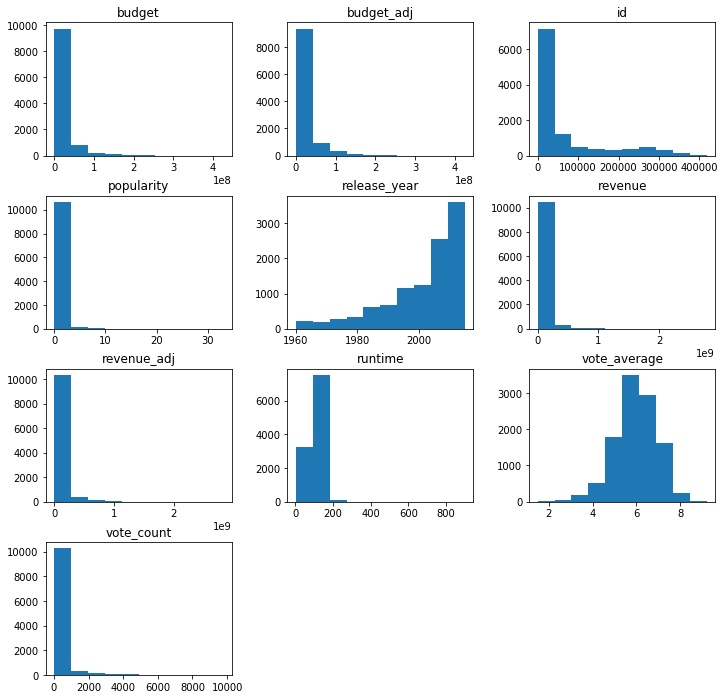

In [9]:
# see the visuals
df.hist(figsize=(12,12), grid=False);

In [10]:
# see that unnecessary cells with null values have dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null float64
revenue           10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null float64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(7), int64(3), object(5)
memory usage: 1.2+ MB


In [11]:
# fill the null cells with "no cast" word
df['cast'].fillna('no cast', inplace = True) 

In [12]:
# fill the null cells with "no director" word
df['director'].fillna('no director', inplace = True) 

In [13]:
# fill the null cells with "no genre" word
df['genres'].fillna('no genre', inplace = True) 

In [14]:
# see that there's no more null cells
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null float64
revenue           10866 non-null float64
original_title    10866 non-null object
cast              10866 non-null object
director          10866 non-null object
runtime           10866 non-null float64
genres            10866 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(7), int64(3), object(5)
memory usage: 1.2+ MB


In [15]:
# drop duplicate
df.drop_duplicates(inplace=True)

In [16]:
# make sure duplicates are dropped
df.duplicated().sum()

0

In [17]:
# find null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null float64
revenue           10865 non-null float64
original_title    10865 non-null object
cast              10865 non-null object
director          10865 non-null object
runtime           10865 non-null float64
genres            10865 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(7), int64(3), object(5)
memory usage: 1.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What kinds of properties are associated with movies that have high revenues?

#### movies with the high revenues types of: Action, Adventure, Science Fiction, Fantasy.
#### top 3 movies with highest revenue: Avatar, Star Wars: The Force Awakens, Titanic.

In [18]:
df.sort_values(by='revenue', ascending=False)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,2.370000e+08,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,4.355219,2.000000e+08,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,7.637767,2.200000e+08,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143.0,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,168259,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
14,99861,5.944927,2.800000e+08,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141.0,Action|Adventure|Science Fiction,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,12445,5.711315,1.250000e+08,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130.0,Adventure|Family|Fantasy,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,109445,6.112766,1.500000e+08,1.274219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102.0,Animation|Adventure|Family,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,68721,4.946136,2.000000e+08,1.215440e+09,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,130.0,Action|Adventure|Science Fiction,4/18/13,6882,6.9,2013,1.872067e+08,1.137692e+09


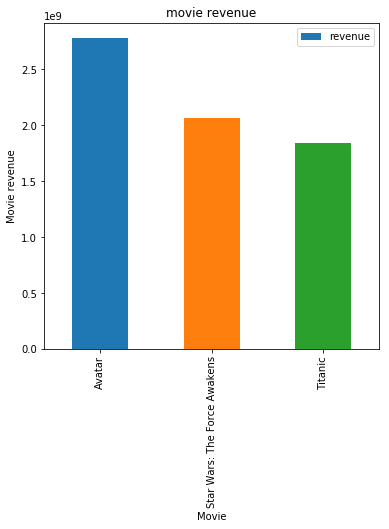

In [19]:
df.sort_values(by='revenue', ascending=False)[:3].plot.bar(x='original_title', y='revenue', figsize=(6, 6));
plt.title('movie revenue');
plt.xlabel('Movie');
plt.ylabel('Movie revenue');
plt.legend();

#### By looking at the figure we know that: highest revenue is for "Avatar" movie.

In [20]:
df['revenue'].nlargest(3)

1386    2.781506e+09
3       2.068178e+09
5231    1.845034e+09
Name: revenue, dtype: float64

In [21]:
df1= pd.DataFrame(df.iloc[[1386]], columns = df.columns)
df1

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


In [22]:
df2 = pd.DataFrame(df.iloc[[3]], columns = df.columns)
df2

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [23]:
df3 = pd.DataFrame(df.iloc[[5230]], columns = df.columns)
df3

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09


### comparing between revenue and budget for highest 3 revenue movies:

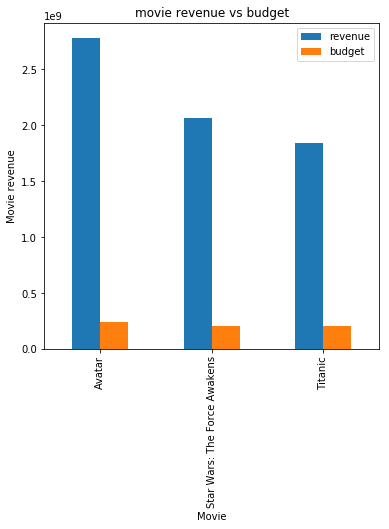

In [24]:
df.sort_values(by='revenue', ascending=False)[:3].plot.bar(x='original_title', y=['revenue', 'budget'], figsize=(6, 6));
plt.title('movie revenue vs budget');
plt.xlabel('Movie');
plt.ylabel('Movie revenue');
plt.legend();


#### By looking at the figure we know that: the budgets are small compared to the revenue.

### Research Question 2: Which genres are most popular from year to year? 

In [25]:
# split the genres
df['genres'] = df.genres.str.split("|",expand=True,)

### The most common genre of movies is: Drama

In [26]:
# get the most commomn genre
df['genres'].mode()

0    Drama
dtype: object

### 5 most common movies genre is :
-Drama

-Comedy

-Action

-Horror

-Adventure

In [27]:
# get the 5 values
genre_plot = df['genres'].value_counts()[:5]

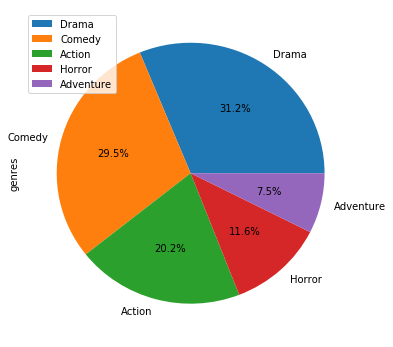

In [28]:
genre_plot.plot.pie(figsize=(6, 6), autopct='%1.1f%%');
plt.legend(loc='upper left');

#### By looking at the figure we know that: Drama is the most common genre between movies with the ratio:31.2%.

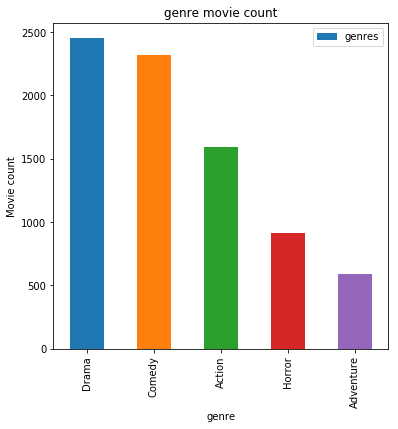

In [29]:
# make values into bar visual
genre_plot.plot.bar(figsize=(6, 6));
plt.title('genre movie count');
plt.xlabel('genre');
plt.ylabel('Movie count');
plt.legend();

#### By looking at the figure we know that: Drama is the most common genre between movies.

### movie genre popularity:

In [30]:
pop = df.groupby('genres')['popularity'].sum()
pop = pop.sort_values(ascending=False)
pop

genres
Drama              1355.149599
Action             1329.866426
Comedy             1245.612333
Adventure           713.670886
Horror              428.779064
Thriller            330.630008
Animation           326.579132
Crime               263.744031
Fantasy             235.386054
Science Fiction     229.642609
Romance             130.973189
Family              105.262164
Documentary          76.473787
Mystery              74.611970
War                  45.255429
Music                44.772991
History              33.643997
Western              29.007138
TV Movie             19.202809
no genre              3.863223
Foreign               1.504115
Name: popularity, dtype: float64

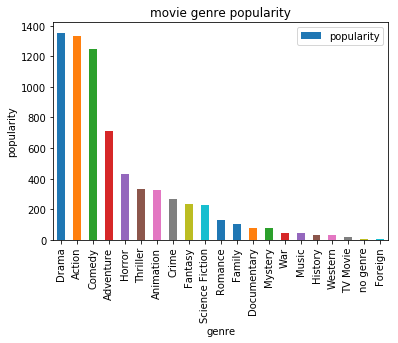

In [31]:
pop.plot.bar()
plt.title('movie genre popularity');
plt.xlabel('genre');
plt.ylabel('popularity');
plt.legend();

#### By looking at the figure we know that: Drama is the most common genre that's popular between watchers.

In [32]:
# count of every movie genre
df['genres'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
no genre             23
Foreign               9
Name: genres, dtype: int64

## Research Question 3 :The director with  the most movie count?
###  The director with  the most movie count is: Woody Allen 

In [33]:
# each director movie count
dict_director = df.director.value_counts().drop('no director').to_dict()
print(dict_director)

{'Woody Allen': 45, 'Clint Eastwood': 34, 'Martin Scorsese': 29, 'Steven Spielberg': 29, 'Ridley Scott': 23, 'Ron Howard': 22, 'Steven Soderbergh': 22, 'Joel Schumacher': 21, 'Brian De Palma': 20, 'Barry Levinson': 19, 'Wes Craven': 19, 'Tim Burton': 19, 'Mike Nichols': 18, 'David Cronenberg': 18, 'John Carpenter': 18, 'Rob Reiner': 18, 'Norman Jewison': 17, 'Robert Zemeckis': 17, 'Sidney Lumet': 17, 'Tyler Perry': 17, 'Stephen Frears': 17, 'Spike Lee': 17, 'Peter Hyams': 17, 'Oliver Stone': 17, 'Renny Harlin': 17, 'Francis Ford Coppola': 17, 'Walter Hill': 17, 'Roman Polanski': 16, 'John Landis': 16, 'Richard Linklater': 16, 'Tony Scott': 16, 'Uwe Boll': 16, 'Richard Donner': 16, 'Blake Edwards': 16, 'Stephen Herek': 16, 'Ivan Reitman': 15, 'Gus Van Sant': 15, 'Robert Altman': 15, 'Neil Jordan': 15, 'David Lynch': 15, 'Garry Marshall': 14, 'John Badham': 14, 'Michael Apted': 14, 'Sam Raimi': 14, 'Robert Rodriguez': 14, 'Chris Columbus': 14, 'Russell Mulcahy': 14, 'Roger Donaldson': 14

In [34]:
# get The director with highest release of movies
max_movie_count = max(dict_director.values())  # maximum value
max_director = [director for director, movie in dict_director.items() if movie == max_movie_count] # getting all keys containing the `maximum`
print('The director with highest release of movies is: {} with {} movies'.format(max_director, max_movie_count))

The director with highest release of movies is: ['Woody Allen'] with 45 movies


### the top 5 directors with the highest movies count:
-'Woody Allen': 45 movies

-'Clint Eastwood': 34 movies

-'Steven Spielberg': 29 movies

-'Martin Scorsese': 29 movies

-'Ridley Scott': 23 movies

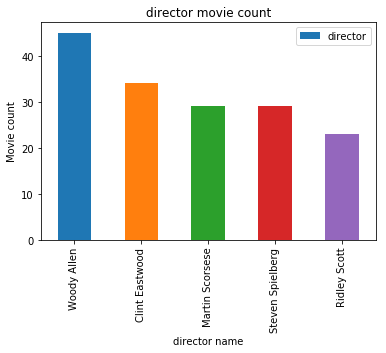

In [35]:
series = df.director.value_counts().drop('no director')[:5]
series.plot(kind='bar');
plt.title('director movie count');
plt.xlabel('director name');
plt.ylabel('Movie count');
plt.legend();

#### By looking at the figure we know that: Woody Allen is the director with the highest movies production.

### Research Question 4: Which year has the highest release of movies?
-The Year with highest release of movies is: [2014] with 700 movies

In [36]:
# every year with its movie count
dict_yearcount = df['release_year'].value_counts().to_dict()
print(dict_yearcount)

{2014: 700, 2013: 659, 2015: 629, 2012: 588, 2011: 540, 2009: 533, 2008: 496, 2010: 489, 2007: 438, 2006: 408, 2005: 364, 2004: 307, 2003: 281, 2002: 266, 2001: 242, 2000: 227, 1999: 224, 1998: 210, 1996: 204, 1997: 192, 1994: 184, 1993: 178, 1995: 175, 1988: 145, 1989: 137, 1992: 133, 1991: 133, 1990: 132, 1987: 125, 1986: 121, 1985: 109, 1984: 105, 1981: 82, 1982: 81, 1983: 80, 1980: 78, 1978: 65, 1979: 57, 1977: 57, 1971: 55, 1973: 55, 1974: 47, 1976: 47, 1966: 46, 1975: 44, 1964: 42, 1970: 41, 1967: 40, 1972: 40, 1968: 39, 1965: 35, 1963: 34, 1962: 32, 1960: 32, 1969: 31, 1961: 31}


In [37]:
max_value = max(dict_yearcount.values())  # maximum value
max_keys = [year for year, value in dict_yearcount.items() if value == max_value] # getting all years containing the `maximum`
# the year highest movie count
print('The Year with highest release of movies is: {} with {} movies'.format(max_keys, max_value))

The Year with highest release of movies is: [2014] with 700 movies


### top 3 years of high movies count
2014: 700 movie 

2013: 659 movie 

2015: 629 movie

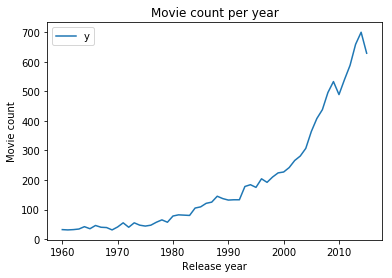

In [38]:
lists = sorted(dict_yearcount.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.title('Movie count per year')
plt.xlabel('Release year')
plt.ylabel('Movie count')
plt.legend('year');
plt.show()

#### By looking at the figure we know that: means the movie production increase by the years.

### A comparison between revenue and accounting for inflation over time for revenue:

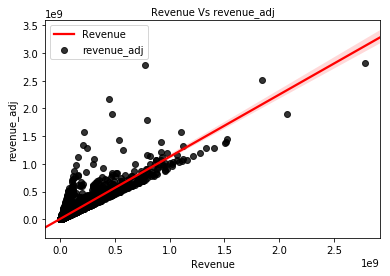

In [39]:
name='revenue'
relation = sns.regplot(x=df['revenue'], y=df['revenue_adj'],scatter_kws={"color": "black"}, line_kws={"color": "red"})
relation.set_title("Revenue Vs revenue_adj",fontsize=10)
relation.set_xlabel("Revenue",fontsize=10)
relation.set_ylabel("revenue_adj",fontsize=10)
plt.legend(labels=["Revenue","revenue_adj"])
plt.show()

#### By looking at the figure we know that: correlation of inflation over time for revenue is strong.

<a id='conclusions'></a>
## Conclusions


### the steps taken during the data exploration:

    Introduction
    Dataset Description
    Data Wrangling
    Data cleaning
    Exploratory Data Analysis
    Conclusions
    
### the main findings:
a quick look at the database:
1-looking at the data shape to know how many movies are in the data set there are:(rows: 10865, columns: 21).
summary statistics:
inculding: -total movie count: 10866 --> after remove duplicate the movies count become 10865

#### Research Question 1: What kinds of properties are associated with movies that have high revenues?
-this section shows properties of movies that have high revenues by its genre, and shows the revenue and budget comparison to view the cost.
movies with the high revenues types of: Action, Adventure, Science Fiction, Fantasy.
top 3 movies with highest revenue: Avatar, Star Wars: The Force Awakens, Titanic.
the movies has low budget comparing to its revenue.

#### Research Question 2: Which genres are most popular from year to year?
-this section shows common genre between the movies and genres popularity:
The most common genre of movies is: Drama
5 most common movies genre is : Drama,Comedy, Action, Horror, Adventure , which 
movie genre popularity:shows that most popular genre is also Drama.

#### Research Question 3:The director with the most movie count?
-this is shows how many movies each director has made and shows popular directors that have high movie count:
The director with the most movie count is: Woody Allen¶
The director with highest release of movies is: ['Woody Allen'] with 45 movies
the top 5 directors with the highest movies count: ('Woody Allen': 45 movies, 'Clint Eastwood': 34 movies, 'Steven Spielberg': 29 movies, 'Martin Scorsese': 29 movies, 'Ridley Scott': 23 movies).


#### Research Question 4: Which year has the highest release of movies?
-this section shows which year has the most movies count with the largest number of movie release:
-The Year with highest release of movies is: [2014] with 700 movies
top 3 years of high movies count: 2014: 700 movie, 2013: 659 movie, 2015: 629 movie.
#### A comparison between revenue and accounting for inflation over time for revenue:
it's the last thing that shows the change in the value of the revenue over time.


#  limitations:

    We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our      analysis is limited to only the provided dataset.

1-There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

2-Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.

3-Exploratory Data Analysis section:
    using the same numerical value of revenue and budget to compare them for the highest movies in revenue, split the genres column to know which genre are most common for the movies genres and the genre column popularity to know which genre is more popular, used director column to find the number of movies they have made, and then get the value of release year without any transformation in data and found the relation between it and the number of movies that has been released, and lastly with the same values of two columns ("revenue","revenue adj") found figure to show correlation.
   

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0